Import module

In [3]:
%matplotlib inline 

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import torch as tc

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics

Import datasheet

In [4]:
iris_flower_dataset = pd.read_csv("./datasheets/IRIS_ Flower_Dataset.csv")
iris_flower_dataset.head(20)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


Data analysis

In [5]:
print("Number of lines : {}".format(iris_flower_dataset.shape[0]))
print(iris_flower_dataset.dtypes)
iris_flower_dataset.describe()

Number of lines : 150
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


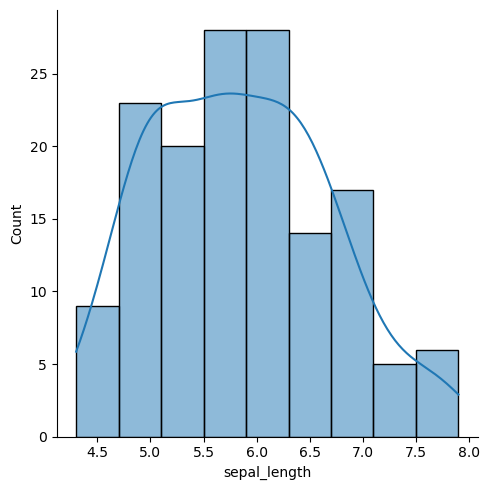

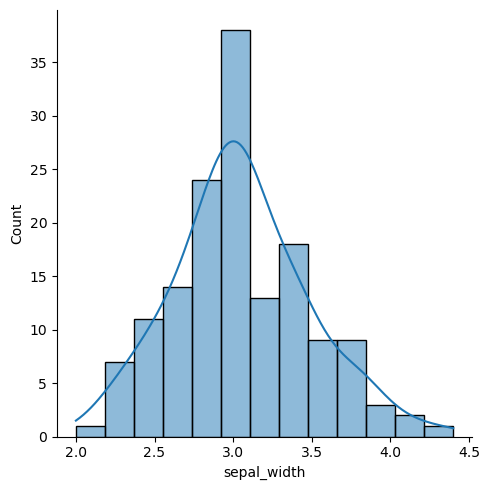

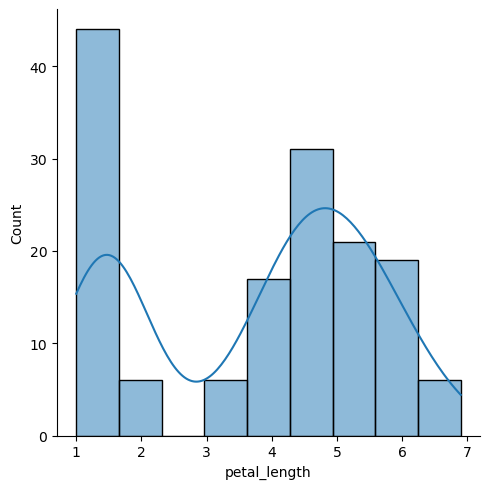

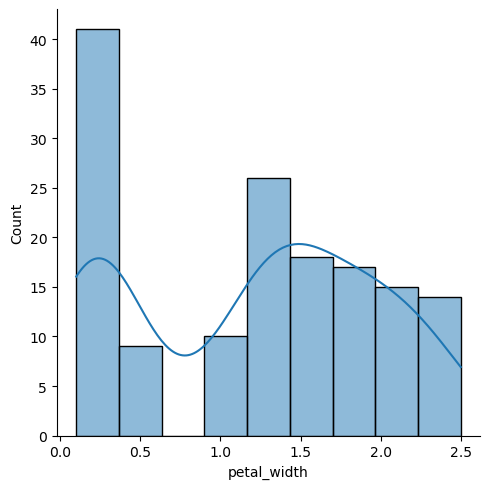

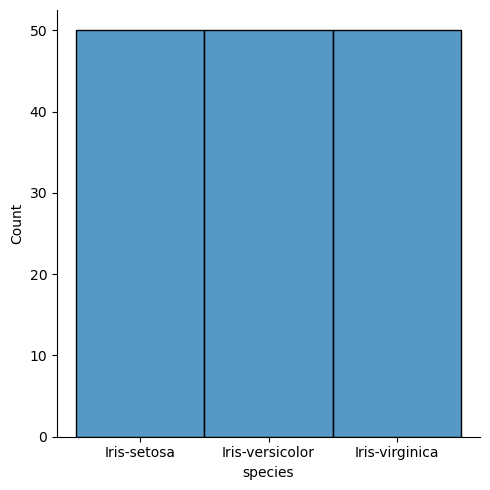

In [6]:
sns.displot(iris_flower_dataset['sepal_length'], kde=True)
sns.displot(iris_flower_dataset['sepal_width'], kde=True)
sns.displot(iris_flower_dataset['petal_length'], kde=True)
sns.displot(iris_flower_dataset['petal_width'], kde=True)
sns.displot(iris_flower_dataset['species'], kde=False)

Clean of the data (no need)

In [7]:
iris_flower_dataset.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Split of the data

In [8]:
X = iris_flower_dataset.loc[:, iris_flower_dataset.columns != "species"]
Y = iris_flower_dataset["species"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

Build of the model

In [9]:
model = SVC()
model.fit(X_train, Y_train)
print("Score : {}".format(model.score(X_test, Y_test)))

Score : 0.9736842105263158


Performance improvement by hyper-parameter modification

In [10]:
# Maybe change the value of kernel or C ?
model = SVC(kernel = "rbf", C = 1)
model.fit(X_train, Y_train)
print("Score with kernel = rbf and C = 1 : {}".format(model.score(X_test, Y_test)))

model = SVC(kernel = "rbf", C = 10)
model.fit(X_train, Y_train)
print("Score with kernel = rbf and C = 10 : {}".format(model.score(X_test, Y_test)))

model = SVC(kernel = "rbf", C = 100)
model.fit(X_train, Y_train)
print("Score with kernel = rbf and C = 100 : {}".format(model.score(X_test, Y_test)))

model = SVC(kernel = "rbf", C = 1000)
model.fit(X_train, Y_train)
print("Score with kernel = rbf and C = 1000 : {}".format(model.score(X_test, Y_test)))

model = SVC(kernel = "linear", C = 1)
model.fit(X_train, Y_train)
print("Score with kernel = linear and C = 1 : {}".format(model.score(X_test, Y_test)))

model = SVC(kernel = "linear", C = 10)
model.fit(X_train, Y_train)
print("Score with kernel = linear and C = 10 : {}".format(model.score(X_test, Y_test)))

model = SVC(kernel = "linear", C = 100)
model.fit(X_train, Y_train)
print("Score with kernel = linear and C = 100 : {}".format(model.score(X_test, Y_test)))

model = SVC(kernel = "linear", C = 1000)
model.fit(X_train, Y_train)
print("Score with kernel = linear and C = 1000 : {}".format(model.score(X_test, Y_test)))

Score with kernel = rbf and C = 1 : 0.9736842105263158
Score with kernel = rbf and C = 10 : 0.9736842105263158
Score with kernel = rbf and C = 100 : 1.0
Score with kernel = rbf and C = 1000 : 0.9473684210526315
Score with kernel = linear and C = 1 : 0.9736842105263158
Score with kernel = linear and C = 10 : 1.0
Score with kernel = linear and C = 100 : 1.0
Score with kernel = linear and C = 1000 : 1.0


In [11]:
# To conclude, one of the best model seems to be :
model = SVC(kernel = "linear", C = 1)
model.fit(X_train, Y_train)
Y_predict = model.predict(X_test)
print("Best score : {}".format(model.score(X_test, Y_test)))

Best score : 0.9736842105263158


Evaluation of the model

Score : 0.9736842105263158
[[12  0  0]
 [ 0 14  1]
 [ 0  0 11]]


<Axes: >

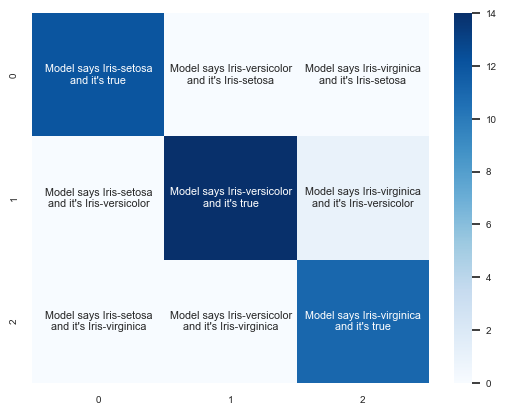

In [12]:
print("Score : {}".format(model.score(X_test, Y_test)))

cf_matrix = metrics.confusion_matrix(Y_test, Y_predict)
print(cf_matrix)

labels = [
    "Model says Iris-setosa\nand it's true", 
    "Model says Iris-versicolor\nand it's Iris-setosa", 
    "Model says Iris-virginica\nand it's Iris-setosa", 
    "Model says Iris-setosa\nand it's Iris-versicolor", 
    "Model says Iris-versicolor\nand it's true", 
    "Model says Iris-virginica\nand it's Iris-versicolor", 
    "Model says Iris-setosa\nand it's Iris-virginica", 
    "Model says Iris-versicolor\nand it's Iris-virginica", 
    "Model says Iris-virginica\nand it's true"
]
labels = np.asarray(labels).reshape(3,3)

sns.set(font_scale=0.65)
sns.heatmap(cf_matrix, annot = labels, fmt = "", cmap = "Blues")

Save the model

In [13]:
tc.save(model, "Model/Model.pt")